____
__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Ciencias de Catos - Caso Practico Clase_08__<br/>
__Alumno: Vaccarello, Fabrizio__<br/>

____

In [1]:
#Datos
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [3]:
df_train = pd.read_csv ('Xy_train.csv', delimiter = ',')
test = pd.read_csv ('X_test.csv' , delimiter = ',' )

In [4]:
df_train.shape

(100, 2)

In [5]:
df_train.describe()

,X,y
count,100.000000,100.000000
mean,4.534694,5.073047
std,2.734487,2.398315
min,0.050223,-0.259323
25%,2.415300,3.735343
50%,3.999217,4.670649
75%,6.686171,5.761732
max,9.728298,13.930549


In [6]:
df_train.isnull().sum()

X    0
y    0
dtype: int64

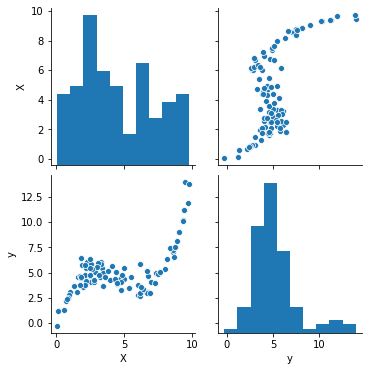

In [7]:
sns.pairplot(df_train)

plt.show()

In [8]:
y_q99 = df_train.y.quantile(0.99)
print("el cuantil 0.99 de la feature 'Y' es = " + str(y_q99))
y_q001 = df_train.y.quantile(0.001)
print("el cuantil 0.001 de la feature 'Y' es = " + str(y_q001))


el cuantil 0.99 de la feature 'Y' es = 13.81368477332469
el cuantil 0.001 de la feature 'Y' es = -0.1123806807409476


In [9]:
df_train_filtrado = df_train.loc[(df_train.y > y_q001 ) & (df_train.y < y_q99 ) ]

In [10]:
x = df_train_filtrado.iloc[:,:-1].values
y = df_train_filtrado.iloc[:,-1].values
print(x.shape,y.shape)

(98, 1) (98,)


# Split Train and Test Set

In [11]:
# Separamos set de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)
# Separamos el set X con las features polinomicas (el set Y ya fue separado en la linea anterior) 
x_train_poly, x_test_poly = train_test_split(x, test_size=0.25, random_state=42)

In [12]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

# Scaler

In [13]:
scaler = preprocessing.StandardScaler().fit(x_train)
scaler

StandardScaler()

In [14]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
poli_reg = PolynomialFeatures(degree = 3)

In [16]:
x_train_poly_scaled = poli_reg.fit_transform(x_train_scaled)
x_test_poly_scaled = poli_reg.fit_transform(x_test_scaled)

In [17]:
# Vamos a crear un dataframe para guardar los resultados del estimador
results_df = pd.DataFrame(columns=['Model','Features','MSE'])

# RIDGE - Polynomial Features

In [18]:
#Definimos estimador
est = Ridge()
#Definimos diccionario con hyperparametros
parameters = {'fit_intercept' : [False, True]}
#Definimos el objeto grid search
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=5, scoring="neg_mean_squared_error")
# Ajusto en modelo Ridge polinomial
gs.fit(x_train_poly_scaled, y_train)
# Obtengo mejor estimador
pred_poly=gs.best_estimator_

In [19]:
# Predecimos para el set polinomico
poly_ridge_prediction = pred_poly.predict(x_test_poly_scaled)
# Calculamos MSE
poly_ridge_mse = mean_squared_error(y_true=y_test, y_pred=poly_ridge_prediction)

(0.0, 15.0)

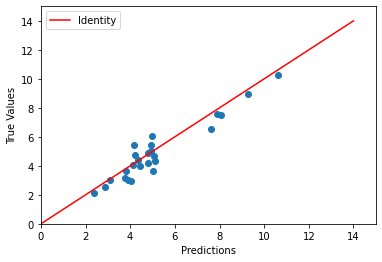

In [20]:
#Vamos a plotear Predictions vs True values del set polinomico
plt.scatter(poly_ridge_prediction, y_test)
plt.plot(np.arange(0,15),np.arange(0,15), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
plt.xlim((0,15))
plt.ylim((0,15))

In [21]:
#Guardamos resultados
results_df = results_df.append({'Model':'Ridge',
                                'Features':'Poly','MSE':poly_ridge_mse},ignore_index=True)
results_df

,Model,Features,MSE
0,Ridge,Poly,0.43899


# Prediccion para el Test Dataset

In [22]:
# Predecimos el Test Dataset con Ridge Polinomial
poly_ridge_prediction = pred_poly.predict(x_test_poly_scaled)

In [23]:
poly_ridge_prediction.round(2)

array([ 4.23,  3.9 ,  5.11,  4.92,  4.03,  8.09,  4.15,  9.26,  5.05,
        4.96, 10.61,  2.85,  3.78,  3.82,  5.02,  4.79,  4.33,  3.11,
        7.89,  4.94,  2.38,  4.79,  7.61,  4.13,  4.42])